In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import r2_score

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
df_train = pd.read_csv(r"C:\Users\User\Desktop\codes_data\Train Data Carb.csv")
df_train.head()

,MD,GR,PEFZ,SP,S-sonic,SEXP,SESP,RT,RHOB,New_feat,New_feat2,New_feat3,NPHI,PHITCPX,K,SW,T2LM_L
0,1756.562,27.64,7.37,-412.38,123.43,10.7475,78.3657,108.2183,2.4458,1.269370,0.333298,7.773877,0.0358,0.0992,9.31,0.5190,122.91400
1,1747.418,32.46,6.77,-424.69,149.03,7.2472,111.9623,128.2477,2.2552,0.062469,1.049670,31.360640,0.0981,0.2801,10.70,0.0277,499.09260
2,1950.720,31.04,7.57,-334.81,161.29,0.8564,5.8217,5.3824,2.2780,0.256275,6.784122,1.740688,0.1362,0.2990,49.81,0.1125,60.21747
3,1940.052,37.18,6.12,-337.25,134.08,5.3996,18.0115,19.4655,2.5448,1.364522,0.022260,3.915700,0.1113,0.2174,0.20,0.5362,84.08492
4,1765.249,30.73,7.25,-413.81,134.00,6.5137,98.0988,167.9960,2.4636,1.638540,0.279549,14.557862,0.1047,0.1484,2.67,0.6651,129.75230


In [4]:
df_test = pd.read_csv(r"C:\Users\User\Desktop\codes_data\Test Data Carb.csv")
df_test.head()

,MD,GR,PEFZ,SP,S-sonic,SEXP,SESP,RT,RHOB,New_feat,New_feat2,New_feat3,NPHI,PHITCPX,K,SW,T2LM_L
0,1909.724,41.96,6.42,-363.13,148.96,3.1383,8.2482,7.5727,2.5097,2.104634,1.372072,1.214135,0.1336,0.1472,10.27,0.8386,73.434000
1,1786.433,36.24,7.01,-403.88,159.32,2.0840,336.5056,657.0143,2.2738,0.273766,12.881616,116.329986,0.1574,0.3457,81.84,0.1204,739.379100
2,1751.076,31.19,7.23,-419.25,144.80,5.1604,160.6909,393.2737,2.2351,0.808883,0.404910,41.136870,0.0990,0.2560,4.09,0.3619,340.794200
3,1696.822,36.82,5.71,-406.25,192.71,23.3661,4986.6070,28475.5300,1.8283,0.000000,63.295900,2761.582957,0.0925,0.5538,684.28,0.0000,233.766500
4,1680.820,96.54,5.34,-394.63,274.52,2.0760,1.7166,1.7492,2.4744,2.279417,0.002958,0.318086,0.2958,0.1853,0.01,0.9212,7.627165


In [5]:
#set MD as index
df_train = df_train.set_index('MD')
df_train.head()

,GR,PEFZ,SP,S-sonic,SEXP,SESP,RT,RHOB,New_feat,New_feat2,New_feat3,NPHI,PHITCPX,K,SW,T2LM_L
MD,,,,,,,,,,,,,,,,
1756.562,27.64,7.37,-412.38,123.43,10.7475,78.3657,108.2183,2.4458,1.269370,0.333298,7.773877,0.0358,0.0992,9.31,0.5190,122.91400
1747.418,32.46,6.77,-424.69,149.03,7.2472,111.9623,128.2477,2.2552,0.062469,1.049670,31.360640,0.0981,0.2801,10.70,0.0277,499.09260
1950.720,31.04,7.57,-334.81,161.29,0.8564,5.8217,5.3824,2.2780,0.256275,6.784122,1.740688,0.1362,0.2990,49.81,0.1125,60.21747
1940.052,37.18,6.12,-337.25,134.08,5.3996,18.0115,19.4655,2.5448,1.364522,0.022260,3.915700,0.1113,0.2174,0.20,0.5362,84.08492
1765.249,30.73,7.25,-413.81,134.00,6.5137,98.0988,167.9960,2.4636,1.638540,0.279549,14.557862,0.1047,0.1484,2.67,0.6651,129.75230


In [6]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM_L', 'New_feat', 'New_feat2', 'New_feat3'], 1) #Feature Matrix
y_train = df_train[['T2LM_L']]

In [7]:
#set MD as index
df_test = df_test.set_index('MD')
df_test.head()

,GR,PEFZ,SP,S-sonic,SEXP,SESP,RT,RHOB,New_feat,New_feat2,New_feat3,NPHI,PHITCPX,K,SW,T2LM_L
MD,,,,,,,,,,,,,,,,
1909.724,41.96,6.42,-363.13,148.96,3.1383,8.2482,7.5727,2.5097,2.104634,1.372072,1.214135,0.1336,0.1472,10.27,0.8386,73.434000
1786.433,36.24,7.01,-403.88,159.32,2.0840,336.5056,657.0143,2.2738,0.273766,12.881616,116.329986,0.1574,0.3457,81.84,0.1204,739.379100
1751.076,31.19,7.23,-419.25,144.80,5.1604,160.6909,393.2737,2.2351,0.808883,0.404910,41.136870,0.0990,0.2560,4.09,0.3619,340.794200
1696.822,36.82,5.71,-406.25,192.71,23.3661,4986.6070,28475.5300,1.8283,0.000000,63.295900,2761.582957,0.0925,0.5538,684.28,0.0000,233.766500
1680.820,96.54,5.34,-394.63,274.52,2.0760,1.7166,1.7492,2.4744,2.279417,0.002958,0.318086,0.2958,0.1853,0.01,0.9212,7.627165


In [8]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM_L', 'New_feat', 'New_feat2', 'New_feat3'], 1) #Feature Matrix
y_test = df_test[['T2LM_L']]

In [9]:
# RF Regressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.9738215699397234
Accuracy of test data: 0.8052907262890543
Mean Absolute Error: 65.17952549866841
Mean Squared Error: 10780.959757143915
Root Mean Squared Error: 103.83140063171601
MAPE 0.511
MPD 33.402


In [10]:
# create the inputs and outputs for train data with new data
X_train = df_train.drop(['T2LM_L', 'New_feat2', 'New_feat3'], 1) #Feature Matrix
y_train = df_train[['T2LM_L']]

In [11]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM_L', 'New_feat2', 'New_feat3'], 1) #Feature Matrix
y_test = df_test[['T2LM_L']]

In [12]:
# RF Regressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.9750358054337483
Accuracy of test data: 0.8064038328466911
Mean Absolute Error: 66.21232299221931
Mean Squared Error: 10719.32757715278
Root Mean Squared Error: 103.53418554831434
MAPE 0.522
MPD 34.651


In [13]:
#!pip install scikit-optimize
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [14]:
search_space = {'n_estimators': Integer(1, 1000),
               'max_depth': Integer(1, 1000),
              'n_jobs': Integer(1, 1000)}
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

bayes_search = BayesSearchCV(model, search_space, cv=3, n_jobs=-1, verbose=1, n_iter=20, random_state=0)

In [15]:
bayes_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20, n_jobs=-1,
              random_state=0,
              search_spaces={'max_depth': Integer(low=1, high=1000, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=1000, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=1000, prior='uniform', transform='normalize')},
              verbose=1)

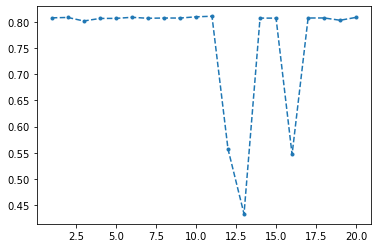

In [16]:
plt.plot(range(1,21), bayes_search.cv_results_['mean_test_score'], '.--')
plt.show()

In [17]:
bayes_search.best_score_

0.8105857707395288

In [18]:
bayes_search.best_params_

OrderedDict([('max_depth', 223), ('n_estimators', 349), ('n_jobs', 988)])

In [19]:
# Bayes

model = bayes_search.best_estimator_

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, model.feature_importances_):
    print(feature)

('GR', 0.026902089318415652)
('PEFZ', 0.03158132424460156)
('SP', 0.019453189171478924)
('S-sonic', 0.018577943943119547)
('SEXP', 0.04448951299787199)
('SESP', 0.0157524235470112)
('RT', 0.01643019906258549)
('RHOB', 0.018829699090934564)
('New_feat', 0.3910191472233095)
('NPHI', 0.050834655870915985)
('PHITCPX', 0.018427632528087278)
('K', 0.23678994954023175)
('SW', 0.11091223346143649)


In [20]:
# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 0.9749422797252002
Accuracy of test data: 0.8092198994687468
Mean Absolute Error: 65.03532220198703
Mean Squared Error: 10563.40330941149
Root Mean Squared Error: 102.77841850024492
MAPE 0.525
MPD 34.016
